<a href="https://colab.research.google.com/github/Fastian-afk/ECG-5000-Dataset_ML/blob/Ahmed-Shaheer-my-project/Main%20project%20Notebook%20V0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

from darts import timeseries
from darts.ad import ForecastingAnomalyModel, NormScorer
from darts.models import TCNModel

train_df = pd.read_csv('/content/drive/MyDrive/Internship/ECG/ECG5000/ECG5000_TRAIN.txt')
test_df = pd.read_csv('/content/drive/MyDrive/Internship/ECG/ECG5000/ECG5000_TEST.txt')

print("Train DataFrame:")
print(train_df.head())

print("Test DataFrame:")
print(test_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train DataFrame:
     1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.ad import ForecastingAnomalyModel, NormScorer
from darts.models import TCNModel

# Loading the training dataset

train_data = pd.read_csv("ECG5000/ECG5000_TRAIN.txt", delim_whitespace=True, header=None)
print("Loaded Training Data:")
print(train_data)

# Loading the test dataset

test_data = pd.read_csv("ECG5000/ECG5000_TEST.txt", delim_whitespace=True, header=None)
print("Loaded Test Data:")
print(test_data)

# Display the shapes of the datasets

print(f"Shape of Training Data: {train_data.shape}")
print(f"Shape of Test Data: {test_data.shape}")

# Check for missing values (null values) in both datasets

print(f"Missing (null) values in Training Data:\n{train_data.isnull().sum()}")
print(f"Missing (null) values in Test Data:\n{test_data.isnull().sum()}")

# Display the first few entries of each dataset to understand their format

print("Sample Entries from Training Data:")
print(train_data.head())
print("Sample Entries from Test Data:")
print(test_data.head())

# Raise an alert for missing values

if train_data.isnull().sum().any():
    print("Warning: Training Data contains missing (null) values!")
else:
    print("No missing (null) values in Training Data.")

if test_data.isnull().sum().any():
    print("Warning: Test Data contains missing (null) values!")
else:
    print("No missing (null) values in Test Data.")

# Identify duplicate rows for both the datasets

train_duplicates_count = train_data.duplicated().sum()
test_duplicates_count = test_data.duplicated().sum()

print(f"Duplicate entries in the Training Data are: {train_duplicates_count}")
print(f"Duplicate entries in the Test Data are: {test_duplicates_count}")

# Raise an alert for duplicate rows

if train_duplicates_count > 0:
    print("Warning: Training Data has duplicate rows!")
else:
    print("No duplicate rows in Training Data.")

if test_duplicates_count > 0:
    print("Warning: Test Data has duplicate rows!")
else:
    print("No duplicate rows in Test Data.")

# Basic statistics for the datasets

print("General Statistics of Training Data are:")
print(train_data.describe())
print("General Statistics of Test Data are:")
print(test_data.describe())

#  Find and display count of each label in the datasets

print("Label Frequency in Training Data is:")
train_label_counts = train_data[0].value_counts()
print(train_label_counts)

print("Label Frequency in Test Data is:")
test_label_counts = test_data[0].value_counts()
print(test_label_counts)

# Determine which label represents "normal"

normal_class_label = 1  # Assumed normal class label

# Count of normal instances

normal_train_count = train_label_counts.get(normal_class_label, 0)
normal_test_count = test_label_counts.get(normal_class_label, 0)

print(f"Count of normal instances in Training Data is: {normal_train_count}")
print(f"Count of normal instances in Test Data is: {normal_test_count}")

# Combine the training and test datasets

merged_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
print("Shape of the Merged Data is:", merged_data.shape)

# Split the merged data into normal and anomalous subsets

normal_data = merged_data[merged_data[0] == normal_class_label]
anomalous_data = merged_data[merged_data[0] != normal_class_label]

# Plot one example from each category
plt.figure(figsize=(12, 6))

# Plot example from normal data
plt.subplot(1, 2, 1)
plt.plot(normal_data.iloc[0, 1:])
plt.title('Normal Instance')

# Plot example from anomalous data
plt.subplot(1, 2, 2)
plt.plot(anomalous_data.iloc[0, 1:])
plt.title('Anomalous Instance')

plt.tight_layout()
plt.show()

# Additional analysis of the combined dataset

# Label distribution in the merged data

print("Label Frequency in the Merged Data is:")
merged_label_counts = merged_data[0].value_counts()
print(merged_label_counts)

# 1. Visualizing the class distribution in merged data

plt.figure(figsize=(10, 5))
sns.countplot(x=merged_data[0])
plt.title("Class Distribution in Merged Data is:")
plt.show()

# 2. Plotting the Time Series samples from the merged data

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i in range(3):
    axes[0, i].plot(merged_data.iloc[i, 1:])
    axes[0, i].set_title(f'Sample {i+1}')
    axes[1, i].plot(merged_data.iloc[i+3, 1:])
    axes[1, i].set_title(f'Sample {i+4}')
plt.tight_layout()
plt.show()

# 3. Heatmap of correlations in merged data

plt.figure(figsize=(15, 10))
sns.heatmap(merged_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap for the Merged Data")
plt.show()

# 4. Statistical summary of merged data features

print("Feature Statistics of Merged Data:")
print(merged_data.describe())

# 5. Boxplot for feature ranges and outliers

merged_data.iloc[:, 1:].boxplot(figsize=(20, 10))
plt.title("Boxplot of Features in the Merged Data")
plt.show()

sns.pairplot(merged_data.iloc[:, :5])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
train_data = pd.read_csv("/content/drive/MyDrive/Internship/ECG/ECG5000/ECG5000_TRAIN.txt", delim_whitespace=True, header=None)
test_data = pd.read_csv("/content/drive/MyDrive/Internship/ECG/ECG5000/ECG5000_TEST.txt", delim_whitespace=True, header=None)

# Merge the training and test datasets
merged_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Define normal and anomalous classes
normal_class_label = 1

# Split the data into normal and anomalous
normal_data = merged_data[merged_data[0] == normal_class_label]
anomalous_data = merged_data[merged_data[0] != normal_class_label]

# Display counts of normal and anomalous data
print(f"Normal data count: {normal_data.shape[0]}")
print(f"Anomalous data count: {anomalous_data.shape[0]}")

# Split normal data into features and labels
X_normal = normal_data.iloc[:, 1:].values
y_normal = normal_data.iloc[:, 0].values

# Split anomalous data into features and labels
X_anomalous = anomalous_data.iloc[:, 1:].values
y_anomalous = anomalous_data.iloc[:, 0].values

# Split the normal data into training, validation, and test sets
X_train_normal, X_temp_normal, y_train_normal, y_temp_normal = train_test_split(X_normal, y_normal, test_size=0.4, random_state=42, stratify=y_normal)
X_val_normal, X_test_normal, y_val_normal, y_test_normal = train_test_split(X_temp_normal, y_temp_normal, test_size=0.5, random_state=42, stratify=y_temp_normal)

# Split the anomalous data into training, validation, and test sets
X_train_anomalous, X_temp_anomalous, y_train_anomalous, y_temp_anomalous = train_test_split(X_anomalous, y_anomalous, test_size=0.4, random_state=42, stratify=y_anomalous)
X_val_anomalous, X_test_anomalous, y_val_anomalous, y_test_anomalous = train_test_split(X_temp_anomalous, y_temp_anomalous, test_size=0.5, random_state=42, stratify=y_temp_anomalous)

# Normalize the normal data based on the training set
scaler_normal = StandardScaler()
X_train_normal = scaler_normal.fit_transform(X_train_normal)
X_val_normal = scaler_normal.transform(X_val_normal)
X_test_normal = scaler_normal.transform(X_test_normal)

# Normalize the anomalous data based on the training set
scaler_anomalous = StandardScaler()
X_train_anomalous = scaler_anomalous.fit_transform(X_train_anomalous)
X_val_anomalous = scaler_anomalous.transform(X_val_anomalous)
X_test_anomalous = scaler_anomalous.transform(X_test_anomalous)

# Display shapes of the splits
print(f"Normal Training data shape: {X_train_normal.shape}")
print(f"Normal Validation data shape: {X_val_normal.shape}")
print(f"Normal Test data shape: {X_test_normal.shape}")

print(f"Anomalous Training data shape: {X_train_anomalous.shape}")
print(f"Anomalous Validation data shape: {X_val_anomalous.shape}")
print(f"Anomalous Test data shape: {X_test_anomalous.shape}")

# Check the mean and standard deviation of the transformed data
print(f"Mean of the normal training data after normalization: {np.mean(X_train_normal, axis=0)}")
print(f"Standard deviation of the normal training data after normalization: {np.std(X_train_normal, axis=0)}")

print(f"Mean of the normal validation data after normalization: {np.mean(X_val_normal, axis=0)}")
print(f"Standard deviation of the normal validation data after normalization: {np.std(X_val_normal, axis=0)}")

print(f"Mean of the normal test data after normalization: {np.mean(X_test_normal, axis=0)}")
print(f"Standard deviation of the normal test data after normalization: {np.std(X_test_normal, axis=0)}")

print(f"Mean of the anomalous training data after normalization: {np.mean(X_train_anomalous, axis=0)}")
print(f"Standard deviation of the anomalous training data after normalization: {np.std(X_train_anomalous, axis=0)}")

print(f"Mean of the anomalous validation data after normalization: {np.mean(X_val_anomalous, axis=0)}")
print(f"Standard deviation of the anomalous validation data after normalization: {np.std(X_val_anomalous, axis=0)}")

print(f"Mean of the anomalous test data after normalization: {np.mean(X_test_anomalous, axis=0)}")
print(f"Standard deviation of the anomalous test data after normalization: {np.std(X_test_anomalous, axis=0)}")

# Prepare the dataset for training
input_chunk_length = 30
output_chunk_length = 1
n_epochs = 1

# Create and train the TCN model
model = TCNModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    kernel_size=2,
    num_filters=16,
    n_epochs=n_epochs,
    dropout=0.2,
    random_state=42
)
model.fit(X_train_normal)

# Save the model
model.save("/content/drive/MyDrive/Internship/Saved model/TCN_Model.pth.tar")

#Load the model
loaded_model = TCNModel.load("/content/drive/MyDrive/Internship/Saved model/TCN_Model.pth.tar")

# Make predictions with the loaded model
pred_series = loaded_model.predict(len(X_val_normal))

# Plot the predictions
plt.figure(figsize=(10, 6))
X_train_normal.plot(label="Train")
X_val_normal.plot(label="Validation")
pred_series.plot(label="Predictions")
plt.legend()
plt.show()

ERROR:darts.utils.ts_utils:ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`.
ERROR:darts.utils.ts_utils:ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`. Raised: `ValueError('input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`.')`


Normal data count: 2919
Anomalous data count: 2081
Normal Training data shape: (1751, 140)
Normal Validation data shape: (584, 140)
Normal Test data shape: (584, 140)
Anomalous Training data shape: (1248, 140)
Anomalous Validation data shape: (416, 140)
Anomalous Test data shape: (417, 140)
Mean of the normal training data after normalization: [-8.67635172e-16 -1.50536351e-15 -3.96370543e-15 -1.74538346e-15
  5.84734368e-15  3.09454854e-15  5.57654056e-15  5.01328150e-16
 -7.52016001e-16 -9.02698184e-16  1.22325051e-15  5.96384259e-16
 -9.68568141e-16  9.02064133e-16  1.56295118e-15 -9.92796809e-16
 -7.59929748e-16  7.45987286e-16 -1.24746333e-15  8.91744956e-16
 -1.41665980e-15 -1.27059727e-15 -3.12864462e-16  2.17003901e-16
  1.67112025e-16  5.13375116e-16  2.55306912e-15  8.95374897e-16
 -1.17657645e-15  3.56938922e-16 -1.48846605e-15 -2.64120219e-15
 -6.78006417e-16  2.17714038e-15 -4.14234926e-15  1.23896705e-15
 -1.45717565e-15 -7.27573341e-16  8.00298973e-16  1.09838213e-15
 -1.

ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`. Raised: `ValueError('input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`.')`

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


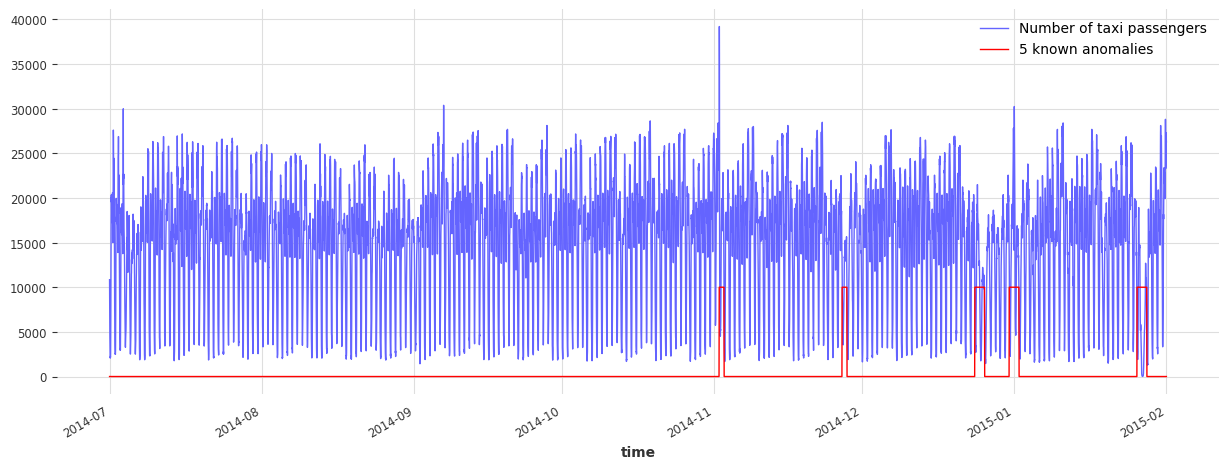

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

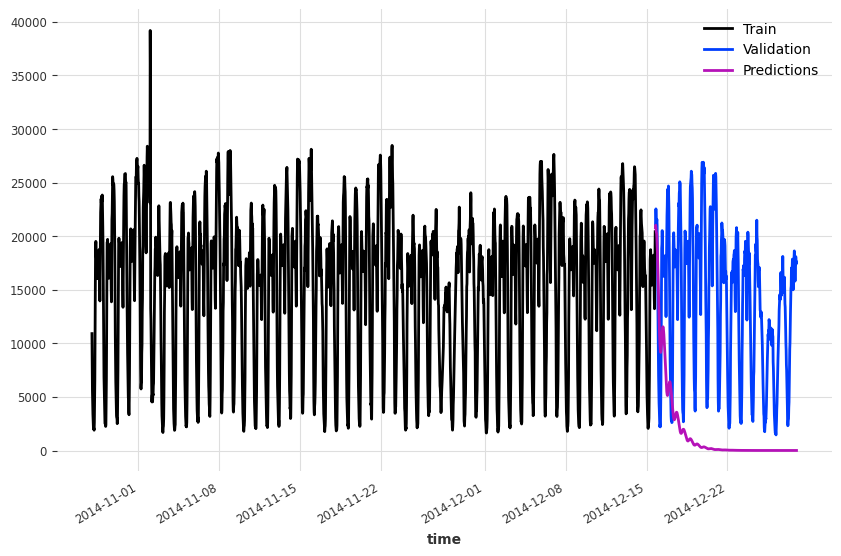

Mean Absolute Percentage Error: 93.66%
Accuracy: 0.32
Precision: 0.78
Recall: 0.05
F1 Score: 0.10


In [ ]:
!pip install darts

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel
from darts.metrics import mape
from darts.datasets import TaxiNewYorkDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
series_taxi = TaxiNewYorkDataset().load()

# Define start and end dates for some known anomalies
anomalies_day = {
    "NYC Marathon": ("2014-11-02 00:00", "2014-11-02 23:30"),
    "Thanksgiving": ("2014-11-27 00:00", "2014-11-27 23:30"),
    "Christmas": ("2014-12-24 00:00", "2014-12-25 23:30"),
    "New Years": ("2014-12-31 00:00", "2015-01-01 23:30"),
    "Snow Blizzard": ("2015-01-26 00:00", "2015-01-27 23:30"),
}
anomalies_day = {k: (pd.Timestamp(v[0]), pd.Timestamp(v[1])) for k, v in anomalies_day.items()}

# Create a series with the binary anomaly flags
anomalies = pd.Series([0] * len(series_taxi), index=series_taxi.time_index)
for start, end in anomalies_day.values():
    anomalies.loc[(start <= anomalies.index) & (anomalies.index <= end)] = 1.0

series_taxi_anomalies = TimeSeries.from_series(anomalies)

# Plot the data and the anomalies
fig, ax = plt.subplots(figsize=(15, 5))
series_taxi.plot(label="Number of taxi passengers", linewidth=1, color="#6464ff")
(series_taxi_anomalies * 10000).plot(label="5 known anomalies", color="r", linewidth=1)
plt.legend()
plt.show()

# Only retain the data for the Thanksgiving anomaly
thanksgiving_start, thanksgiving_end = anomalies_day["Thanksgiving"]
series_taxi_thanksgiving = series_taxi.slice(thanksgiving_start - pd.Timedelta(days=30), thanksgiving_end + pd.Timedelta(days=30))

# Prepare the dataset for training
input_chunk_length = 30
output_chunk_length = 1
n_epochs = 1

# Split the series into training and validation sets
train, val = series_taxi_thanksgiving.split_before(0.8)

# Create and train the TCN model
"""
model = TCNModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    kernel_size=2,
    num_filters=16,
    n_epochs=n_epochs,
    dropout=0.2,
    random_state=42
)
model.fit(train)
"""

# Save the model
model.save("/content/drive/MyDrive/Internship/Saved model/TCN_Model.pth.tar")

#Load the model
loaded_model = TCNModel.load("/content/drive/MyDrive/Internship/Saved model/TCN_Model.pth.tar")

# Make predictions with the loaded model
pred_series = loaded_model.predict(len(val))

# Plot the predictions
plt.figure(figsize=(10, 6))
train.plot(label="Train")
val.plot(label="Validation")
pred_series.plot(label="Predictions")
plt.legend()
plt.show()

# Calculate and print the Mean Absolute Percentage Error
error = mape(val, pred_series)
print(f"Mean Absolute Percentage Error: {error:.2f}%")

# Detect anomalies based on prediction errors
threshold = 1.5 * np.std(train.values())  # Adjusted threshold
actual_anomalies = (val.values() > threshold).astype(int)
predicted_anomalies = (pred_series.values() > threshold).astype(int)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(actual_anomalies, predicted_anomalies)
precision = precision_score(actual_anomalies, predicted_anomalies)
recall = recall_score(actual_anomalies, predicted_anomalies)
f1 = f1_score(actual_anomalies, predicted_anomalies)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
!pip install darts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from darts import TimeSeries
from darts.models import TCNModel
from darts.ad import ForecastingAnomalyModel, NormScorer
import tensorflow as tf

# Load the dataset
train_data = pd.read_csv("/content/drive/MyDrive/Internship/ECG/ECG5000/ECG5000_TRAIN.txt", delim_whitespace=True, header=None)
test_data = pd.read_csv("/content/drive/MyDrive/Internship/ECG/ECG5000/ECG5000_TEST.txt", delim_whitespace=True, header=None)

# Merge the training and test datasets
merged_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Define normal and anomalous classes
normal_class_label = 1

# Split the data into normal and anomalous
normal_data = merged_data[merged_data[0] == normal_class_label]
anomalous_data = merged_data[merged_data[0] != normal_class_label]

# Split normal data into features and labels
X_normal = normal_data.iloc[:, 1:].values

# Split the normal data into training, validation, and test sets
X_train_normal, X_temp_normal = train_test_split(X_normal, test_size=0.4, random_state=42)
X_val_normal, X_test_normal = train_test_split(X_temp_normal, test_size=0.5, random_state=42)

# Normalize the normal data based on the training set
scaler_normal = StandardScaler()
X_train_normal = scaler_normal.fit_transform(X_train_normal)
X_val_normal = scaler_normal.transform(X_val_normal)
X_test_normal = scaler_normal.transform(X_test_normal)

# Convert the training data into Darts TimeSeries format
series_train = TimeSeries.from_values(X_train_normal)
series_val = TimeSeries.from_values(X_val_normal)

# Ensure TimeSeries object is non-deterministic (has multiple samples)
if series_train.n_samples == 1:
    series_train = series_train.stack(series_train)
if series_val.n_samples == 1:
    series_val = series_val.stack(series_val)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train a forecasting model on the normal data
model = TCNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    n_epochs=200,         # set a high number of epochs and let early stopping handle when to stop
    batch_size=8,
    random_state=42
)

model.fit(series_train, val_series=series_val, callbacks=[early_stopping])
model.save("/content/drive/MyDrive/Internship/Saved model/TCN_Model.pth.tar")

# Create an anomaly detection model using the trained forecasting model
anomaly_model = ForecastingAnomalyModel(model, scorer=NormScorer())

# Calculate anomaly scores on the validation data
anomaly_scores_val = anomaly_model.score(series_val)

# Decide the threshold based on validation data anomaly scores
mean_score = np.mean(anomaly_scores_val.values())
std_score = np.std(anomaly_scores_val.values())
threshold = mean_score + 3 * std_score
print(f"Anomaly detection threshold: {threshold}")

# Calculate anomaly scores on the test data (both normal and anomalous)
series_test_normal = TimeSeries.from_values(X_test_normal)
if series_test_normal.n_samples == 1:
    series_test_normal = series_test_normal.stack(series_test_normal)
anomaly_scores_test_normal = anomaly_model.score(series_test_normal)

# Print anomaly scores for normal test data
print("Anomaly Scores for Normal Test Data:")
print(anomaly_scores_test_normal.values())

# Plot the ECG graphs with predicted anomalies for normal test data
plt.figure(figsize=(12, 6))
plt.plot(X_test_normal[0], label='ECG Signal')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('ECG Signal with Anomaly Threshold (Normal Data)')
plt.legend()
plt.show()

# Process the anomalous data
X_anomalous = anomalous_data.iloc[:, 1:].values

# Normalize the anomalous data
X_anomalous = scaler_normal.transform(X_anomalous)

# Calculate anomaly scores on the anomalous test data
series_anomalous = TimeSeries.from_values(X_anomalous)
if series_anomalous.n_samples == 1:
    series_anomalous = series_anomalous.stack(series_anomalous)
anomaly_scores_anomalous = anomaly_model.score(series_anomalous)

# Print anomaly scores for anomalous data
print("Anomaly Scores for Anomalous Test Data:")
print(anomaly_scores_anomalous.values())

# Plot the ECG graphs with predicted anomalies for anomalous data
plt.figure(figsize=(12, 6))
plt.plot(X_anomalous[0], label='ECG Signal')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('ECG Signal with Anomaly Threshold (Anomalous Data)')
plt.legend()
plt.show()

# Additional analysis and visualization
# Plot anomaly scores for normal and anomalous data
plt.figure(figsize=(12, 6))
plt.plot(anomaly_scores_test_normal.values(), label='Normal Data Anomaly Scores')
plt.plot(anomaly_scores_anomalous.values(), label='Anomalous Data Anomaly Scores', color='red')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Anomaly Scores')
plt.legend()
plt.show()


TypeError: TorchForecastingModel.fit() got an unexpected keyword argument 'callbacks'